In [8]:
from serial import Serial
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

dev = Serial(port='/dev/ttyUSB0', baudrate=115200, timeout=1)
dev.reset_input_buffer()
dev.reset_output_buffer()



0
11515
23032
34549
46072
57594
65535
num of samples = 65535
[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
0


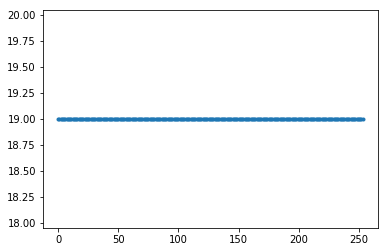

In [66]:
dev.reset_input_buffer()
dev.reset_output_buffer()
# read all samples

dev.write(b'\x23'); sleep(0.1); dev.write(b'\23') # clear memmory

dev.write(b'\x21')  # select sampler

sleep(1)

dev.write(b'\x22')  # start sample-reader
buf = b''

while True:
    print(len(buf))
    b = dev.read(65535)
    if not len(b):
        break
    buf += b
    
samples = [int(x) for x in buf]
print('num of samples =', len(samples))
print(samples[:20])

dev.write(b'\x24')
offset = ord(dev.read(1))
print(offset)
offset += 255
post = (samples + samples + samples)[offset-127:offset+127]

a = np.array(post)
plt.plot(a, '.-')

0 128 382
[117, 119, 121, 123, 125, 129, 131, 133, 135, 137]


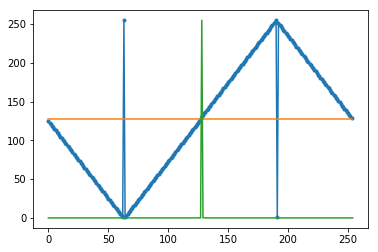

In [171]:
dev.reset_input_buffer()
# read all samples
dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
samples = [int(x) for x in samples]

dev.write(b'\x24')
offset = ord(dev.read(1)) + 255
print(offset-255, offset-127, offset+127)
post = (samples + samples + samples)[offset-127:offset+127]

print((samples + samples + samples)[offset-5:offset+5])

a = np.array(post)
plt.plot(a, '.-')
plt.plot(np.linspace(0x80, 0x80, len(a)), '-')
vert = np.linspace(0, 0, 255)
vert[128] = 255
plt.plot(vert, '-')


sample offset =  121


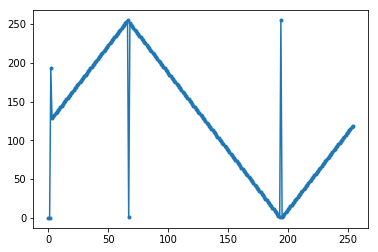

In [164]:
dev.write(b'\x31')  # select trigger config
dev.write(b'\x02')  # select edge
dev.write(b'\x80')  # upper bound is 128
dev.write(b'\x80')  # lower bound is 128

dev.write(b'\x25'); dev.write(b'\x01')  # choose adc

dev.write(b'\x23'); dev.write(b'\x00') # clear memmory

dev.write(b'\x21')  # select sampler
sleep(1)
# read all samples
dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
# print(samples)  # read all samples
# print('sample count = ', len(samples))
dev.write(b'\x24')
sample_offest = ord(dev.read(1))
print('sample offset = ', sample_offest)

a = np.array([int(x) for x in samples])
plots = plt.plot(a, '.-')

In [158]:
dev.reset_input_buffer()
dev.write(b'\x24')
for x in range(4):
    dat = dev.read(1)
    print('0x' + dat.hex())

dev.reset_input_buffer()
dev.write(b'\x24')
dev.read(100)


0x00
0x00
0x00
0x00


b'\x00\x00\x00\x00'

4

In [167]:
0x80

128